In [2]:
%run init.ipynb
%run init-tensor_product.ipynb

# Espelhos

In [3]:
M = pauli(2)*pauli(3)
#M

In [4]:
mbk(M)

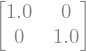

In [5]:
M*tsco(M)

# QWP

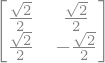

In [6]:
H = (1/sqrt(2))*(pauli(1) + pauli(3))
H

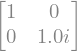

In [7]:
S = pauli(0)
S[1,1] = 1j
S

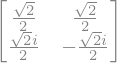

In [8]:
QWP = S*H
mysim(QWP)

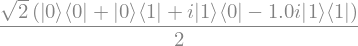

In [9]:
mbk(QWP).simplify()

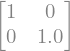

In [10]:
QWP*tsco(QWP)

# BS

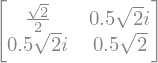

In [11]:
BS = S*H*S
simplify(BS)

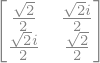

In [12]:
simplify(BS, rational=True)

# HWP = CNOT = $C_X^{AB}$

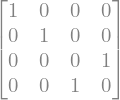

In [14]:
# c = path
# t = polarization
HWP_ct = CNOT_ct = tp(proj(pket('0')), pauli(0)) + tp(proj(pket('1')), pauli(1))
CNOT_ct

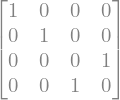

In [15]:
HWP_ct

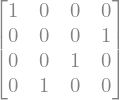

In [16]:
HWP_tc = CNOT_tc = tp(pauli(0),proj(pket('0'))) + tp(pauli(1), proj(pket('1')))
HWP_tc

# PBS

## C_Z = $C_Z^{AB}$

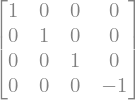

In [17]:
CZ_ct = tp(proj(pket('0')), pauli(0)) + tp(proj(pket('1')), pauli(3))
CZ_ct

## C_Y = $C_Y^{AB}$

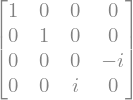

In [20]:
CY_ct = tp(proj(pket('0')), pauli(0)) + tp(proj(pket('1')), pauli(2))
mysim(CY_ct)

## PBS

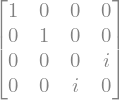

In [22]:
PBS_ct = CY_ct*CZ_ct
mysim(PBS_ct)

# BBO_AB

## $U3(\theta, \phi, \lambda)$

In [23]:
th, ph, lb = symbols('theta, phi, lambda', real=True)
th, ph, lb

In [24]:
cp, cm = symbols('c_+, c_-', real=True)
cp, cm

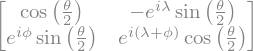

In [26]:
U3 = cos(th/2)*pauli(0) + sin(th/2)*pauli(1)
U3[0,1] = -U3[0,1]*exp(1j*lb)
U3[1,0] = U3[1,0]*exp(1j*ph)
U3[1,1] = U3[1,1]*exp(1j*(ph+lb))
mysim(U3)

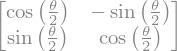

In [29]:
RY = U3.subs(ph, 0).subs(lb, 0)
RY

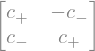

In [30]:
RY = RY.subs(cos(th/2), cp).subs(sin(th/2), cm)
RY

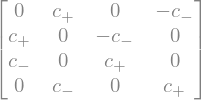

In [32]:
BBOp_ct = tp(pauli(0),pauli(1))*CNOT_ct*tp(RY, pauli(0))
BBOp_ct